In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 222MB/s]
100% 1.06G/1.06G [00:04<00:00, 246MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Conv2D, Dense, MaxPooling2D, BatchNormalization, Dropout

Generators

In [5]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


Normalize the images in the np array

In [6]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

Model

In [32]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [34]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=15,validation_data=validation_ds)

Epoch 1/15
625/625 [==============================] - 71s 107ms/step - loss: 1.2438 - accuracy: 0.5464 - val_loss: 0.6669 - val_accuracy: 0.5568
Epoch 2/15
625/625 [==============================] - 67s 107ms/step - loss: 0.6707 - accuracy: 0.5766 - val_loss: 0.9384 - val_accuracy: 0.5530
Epoch 3/15
625/625 [==============================] - 67s 107ms/step - loss: 0.6337 - accuracy: 0.6423 - val_loss: 0.5696 - val_accuracy: 0.6654
Epoch 4/15
625/625 [==============================] - 67s 107ms/step - loss: 0.5251 - accuracy: 0.7119 - val_loss: 0.5049 - val_accuracy: 0.7552
Epoch 5/15
625/625 [==============================] - 67s 107ms/step - loss: 0.4665 - accuracy: 0.7416 - val_loss: 0.4375 - val_accuracy: 0.8034
Epoch 6/15
625/625 [==============================] - 66s 105ms/step - loss: 0.4207 - accuracy: 0.7860 - val_loss: 0.9499 - val_accuracy: 0.6948
Epoch 7/15
625/625 [==============================] - 65s 103ms/step - loss: 0.3772 - accuracy: 0.8143 - val_loss: 0.4767 - val_ac

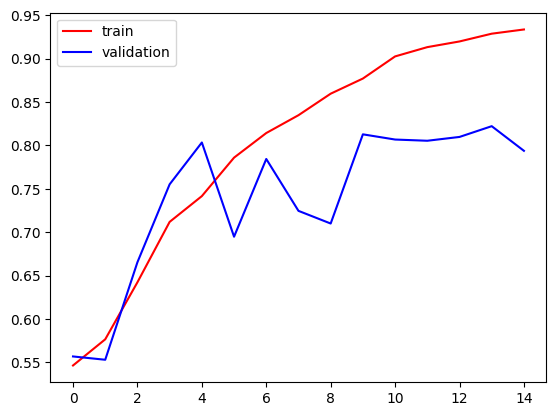

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

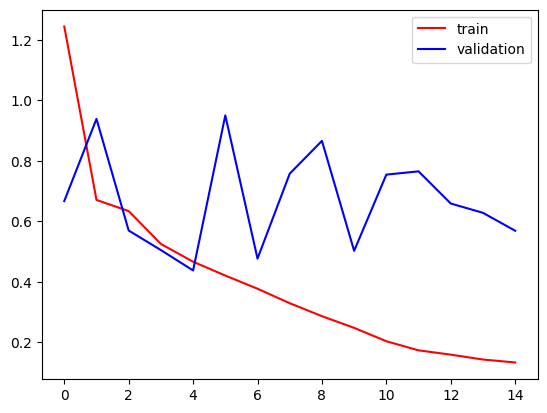

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [35]:
from keras.preprocessing.image import ImageDataGenerator

In [36]:
train_data_dir = '/content/train'
validation_data_dir = '/content/test'
nb_train_samples = 20000
nb_validation_samples = 5000
epochs=10
batch_size=32
image_size=(256,256)

In [37]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

In [38]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [39]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10)


history1 = model.fit(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size,
    callbacks=[early_stop]
    )

Epoch 1/10
625/625 [==============================] - 316s 500ms/step - loss: 1.2181 - accuracy: 0.5928 - val_loss: 0.5866 - val_accuracy: 0.6861
Epoch 2/10
625/625 [==============================] - 318s 508ms/step - loss: 0.5749 - accuracy: 0.6970 - val_loss: 0.5276 - val_accuracy: 0.7454
Epoch 3/10
625/625 [==============================] - 315s 504ms/step - loss: 0.5047 - accuracy: 0.7545 - val_loss: 0.7359 - val_accuracy: 0.6893
Epoch 4/10
625/625 [==============================] - 326s 522ms/step - loss: 0.4569 - accuracy: 0.7878 - val_loss: 0.4572 - val_accuracy: 0.7929
Epoch 5/10
625/625 [==============================] - 315s 503ms/step - loss: 0.4233 - accuracy: 0.8091 - val_loss: 0.5232 - val_accuracy: 0.7516
Epoch 6/10
625/625 [==============================] - 315s 504ms/step - loss: 0.3972 - accuracy: 0.8270 - val_loss: 0.4276 - val_accuracy: 0.8085
Epoch 7/10
625/625 [==============================] - 326s 522ms/step - loss: 0.3665 - accuracy: 0.8436 - val_loss: 0.3815 -

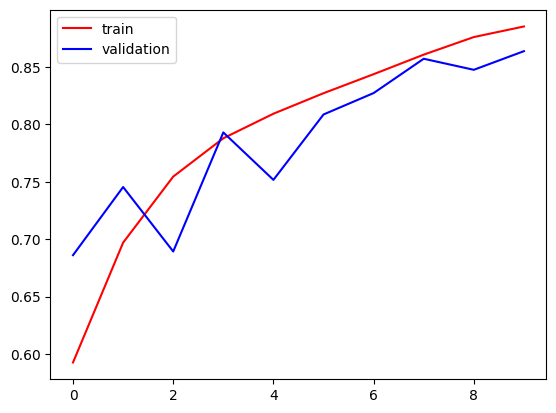

In [41]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

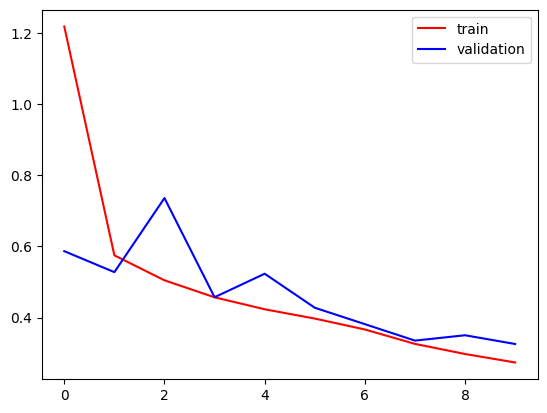

In [43]:
plt.plot(history1.history['loss'],color='red',label='train')
plt.plot(history1.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()